## 어제 오른 내 주식, 과연 내일은?

|평가문항|상세기준|
|---|---|
|1. 시계열의 안정성이 충분히 확인되었는가?|플로팅과 adfuller 메소드 사용으로 시계열의 안정성이 (충분히) 확인되는 것을 시각화하였으며, 이에 대한 충분한 설명(해당 메소드에 대한 이해)이 서술되어있음|
|2. ARIMA 모델 모수선택 근거를 체계적으로 제시하였는가?|p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시됨|
|3. 예측 모델의 오차율이 기준 이하로 정확하게 나왔는가?|3개 이상 종목이 MAPE 15% 미만의 정확도로 예측됨|


분석을 실시할 주식으로 먼저 현대자동차 주식을 선택해서 진행하도록 한다.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

In [2]:
now = datetime.now()
now=now.date().strftime('%Y-%m-%d')
now

'2023-04-02'

In [3]:
data_HDmotor=pd.DataFrame(yf.download('005380.KS',
                                          start = '2022-04-01',
                                          end = now,
                                          progress = False))
data_HDmotor

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-01,178000.0,178500.0,177000.0,178000.0,170319.875000,470770
2022-04-04,177000.0,179000.0,174500.0,178000.0,170319.875000,509106
2022-04-05,178500.0,180000.0,177000.0,179000.0,171276.718750,426072
2022-04-06,177000.0,182000.0,176500.0,180000.0,172233.578125,641803
2022-04-07,180000.0,182000.0,178500.0,178500.0,170798.296875,778374
...,...,...,...,...,...,...
2023-03-27,177700.0,177700.0,174800.0,176100.0,176100.000000,402749
2023-03-28,177100.0,178300.0,175800.0,177100.0,177100.000000,341408
2023-03-29,175800.0,180700.0,175800.0,180400.0,180400.000000,571771


In [4]:
date_range=pd.date_range(start='2022-04-01', end='2023-03-31')
data_HDmotor = data_HDmotor.reindex(date_range)
data_HDmotor

,Open,High,Low,Close,Adj Close,Volume
2022-04-01,178000.0,178500.0,177000.0,178000.0,170319.87500,470770.0
2022-04-02,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-03,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-04,177000.0,179000.0,174500.0,178000.0,170319.87500,509106.0
2022-04-05,178500.0,180000.0,177000.0,179000.0,171276.71875,426072.0
...,...,...,...,...,...,...
2023-03-27,177700.0,177700.0,174800.0,176100.0,176100.00000,402749.0
2023-03-28,177100.0,178300.0,175800.0,177100.0,177100.00000,341408.0
2023-03-29,175800.0,180700.0,175800.0,180400.0,180400.00000,571771.0
2023-03-30,179200.0,181900.0,178800.0,181200.0,181200.00000,525981.0


In [5]:
data_HDmotor = data_HDmotor.interpolate(method='time')
data_HDmotor

,Open,High,Low,Close,Adj Close,Volume
2022-04-01,178000.000000,178500.000000,177000.000000,178000.0,170319.87500,470770.000000
2022-04-02,177666.666667,178666.666667,176166.666667,178000.0,170319.87500,483548.666667
2022-04-03,177333.333333,178833.333333,175333.333333,178000.0,170319.87500,496327.333333
2022-04-04,177000.000000,179000.000000,174500.000000,178000.0,170319.87500,509106.000000
2022-04-05,178500.000000,180000.000000,177000.000000,179000.0,171276.71875,426072.000000
...,...,...,...,...,...,...
2023-03-27,177700.000000,177700.000000,174800.000000,176100.0,176100.00000,402749.000000
2023-03-28,177100.000000,178300.000000,175800.000000,177100.0,177100.00000,341408.000000
2023-03-29,175800.000000,180700.000000,175800.000000,180400.0,180400.00000,571771.000000
2023-03-30,179200.000000,181900.000000,178800.000000,181200.0,181200.00000,525981.000000


In [6]:
data_HDmotor.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data_HDmotor=data_HDmotor["Close"]

In [8]:
data_HDmotor_log=np.log(data_HDmotor)
data_HDmotor_log

2022-04-01    12.089539
2022-04-02    12.089539
2022-04-03    12.089539
2022-04-04    12.089539
2022-04-05    12.095141
                ...    
2023-03-27    12.078807
2023-03-28    12.084470
2023-03-29    12.102932
2023-03-30    12.107357
2023-03-31    12.125405
Freq: D, Name: Close, Length: 365, dtype: float64

In [9]:
from statsmodels.tsa.stattools import adfuller

def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

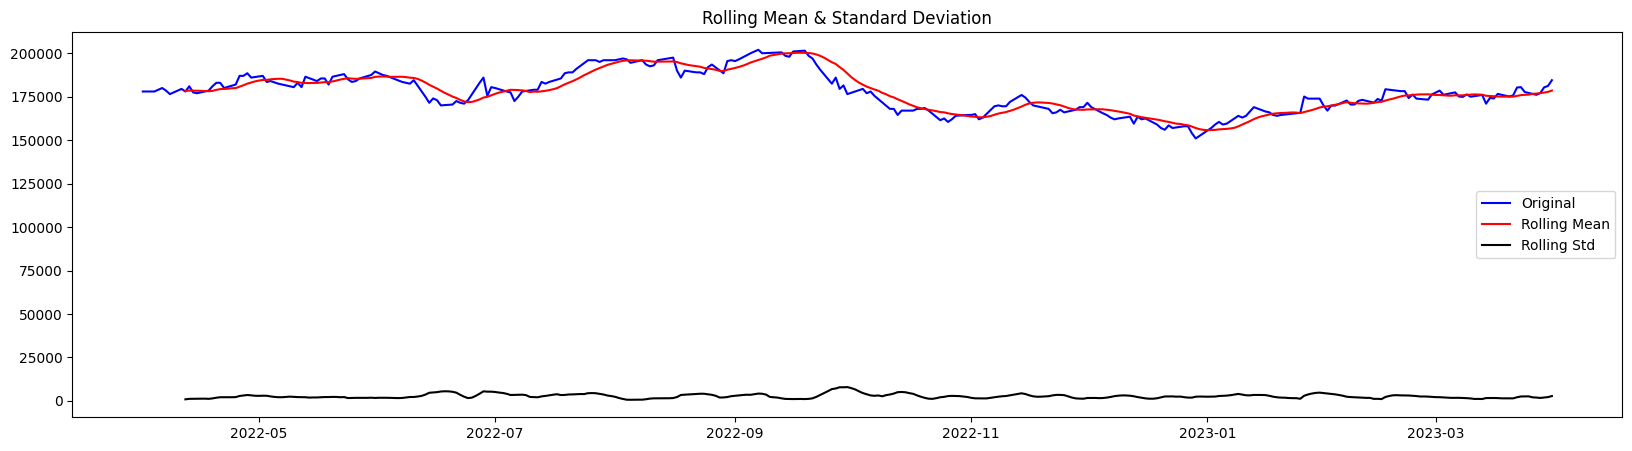

Results of Dickey-Fuller Test:
Test Statistic                  -1.648340
p-value                          0.457906
#Lags Used                       0.000000
Number of Observations Used    364.000000
Critical Value (1%)             -3.448443
Critical Value (5%)             -2.869513
Critical Value (10%)            -2.571018
dtype: float64


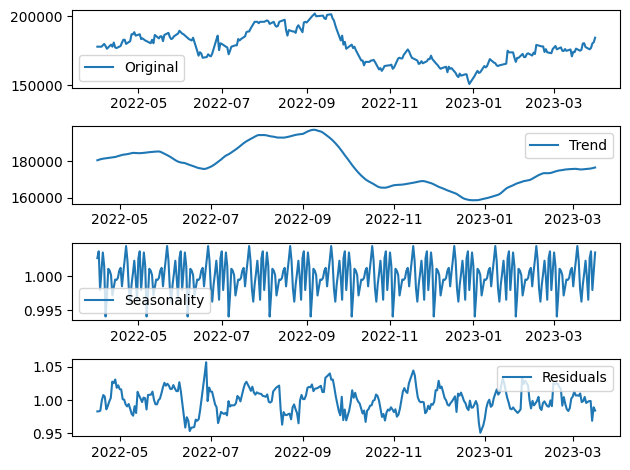

In [10]:
plt.figure(figsize=(20,5))
# 정성적 그래프 분석
plot_rolling_statistics(data_HDmotor, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(data_HDmotor)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_HDmotor, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_HDmotor, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


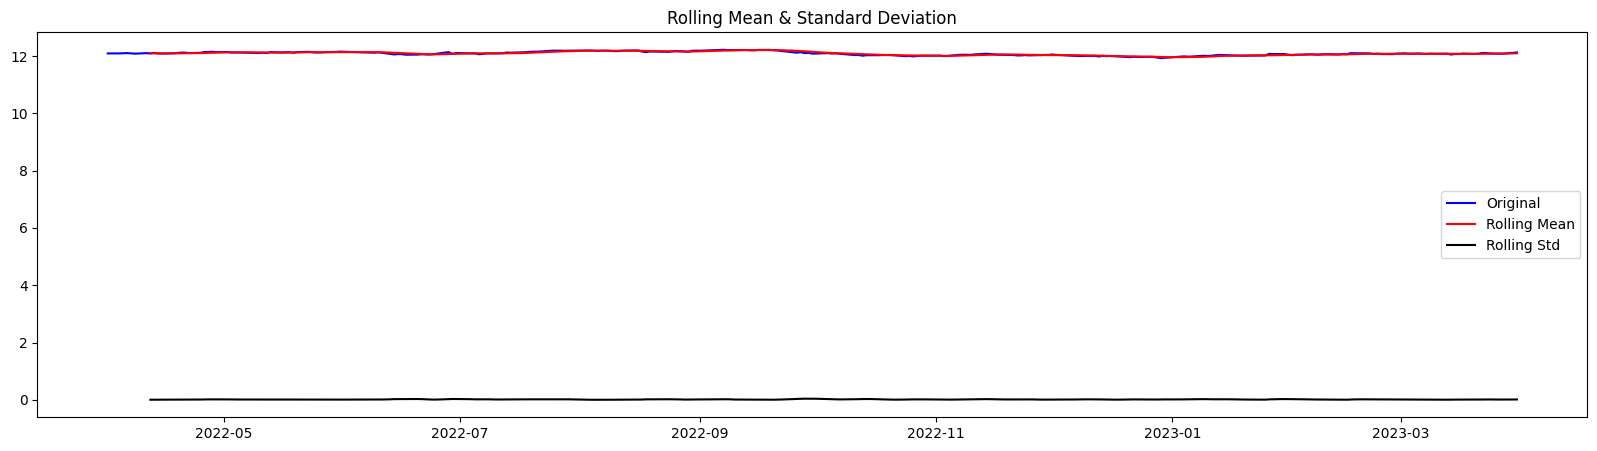

Results of Dickey-Fuller Test:
Test Statistic                  -1.647673
p-value                          0.458254
#Lags Used                       0.000000
Number of Observations Used    364.000000
Critical Value (1%)             -3.448443
Critical Value (5%)             -2.869513
Critical Value (10%)            -2.571018
dtype: float64


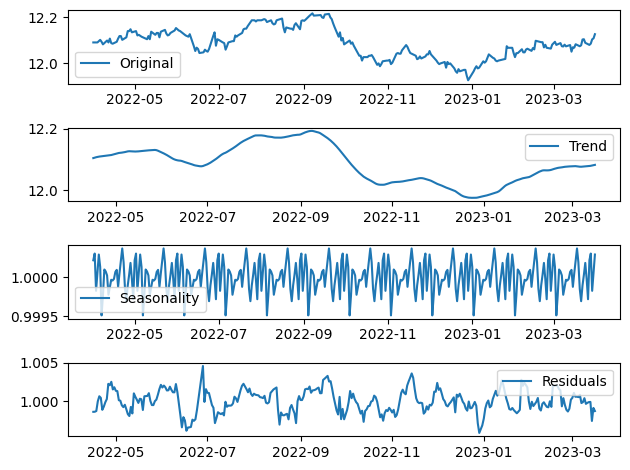

In [11]:
plt.figure(figsize=(20,5))
# 정성적 그래프 분석
plot_rolling_statistics(data_HDmotor_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(data_HDmotor_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_HDmotor_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_HDmotor_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


위의 그래프들을 통해 현대자동차 주식의 시계열 데이터를 분석할 수 있다.

현대자동차의 데이터의 close값 만을 취한후에 log를 취한 데이터를 새로 만들었다.  
그후, 각각의 original 그래프에서 trend, seasonal 데이터를 추출하여 Residual 데이터를 만들어 내고 그 그래프를 그려보았다.  
그리고 해당 그래프의 안정성이 확보되지 않았다는 귀무가설을 증명하도록 adfuller 함수를 실행하여본다.  

실행 결과 양쪽 모두 p-value가 0.05이하가 되지 않았기에 어느쪽도 안정적인 데이터라고 말할 순 없다.

In [12]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.884061e+00
p-value                        1.409295e-09
#Lags Used                     7.000000e+00
Number of Observations Used    3.270000e+02
Critical Value (1%)           -3.450507e+00
Critical Value (5%)           -2.870420e+00
Critical Value (10%)          -2.571501e+00
dtype: float64


log를 취한 데이터의 residual의 p-value는 1.627457e-28로 0.05보다 매우 작은수를 나타낸다.  
이는 귀무가설이 거짓임을 나타내므로, 대립가설이 참임이 증명된다.  
따라서 residual 데이터는 안정성을 가졌다는것이 증명된다.

C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


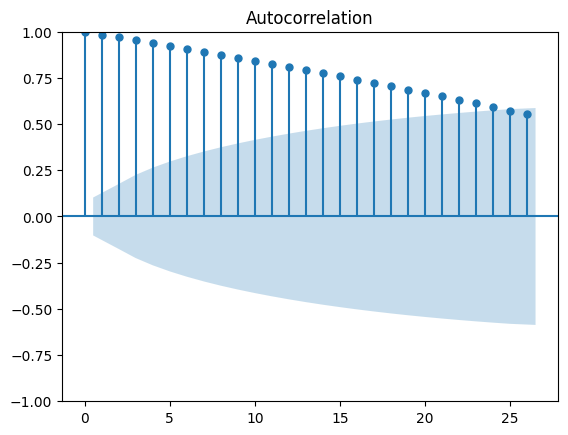

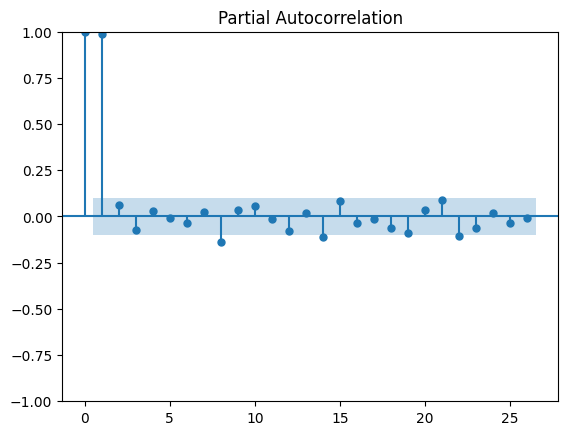

In [13]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_HDmotor_log)
plot_pacf(data_HDmotor_log)
plt.show()

ACF와 PACF를 그려본 결과 해당 데이터는 AR모형을 따르는 것을 알 수 있다.  
또한 시차 1 이후부터 PACF가 0에 수렴하므로 p가 1이고 q는 0이라는것을 알 수 있다.

Results of Dickey-Fuller Test:
Test Statistic                 -19.840212
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    363.000000
Critical Value (1%)             -3.448494
Critical Value (5%)             -2.869535
Critical Value (10%)            -2.571029
dtype: float64


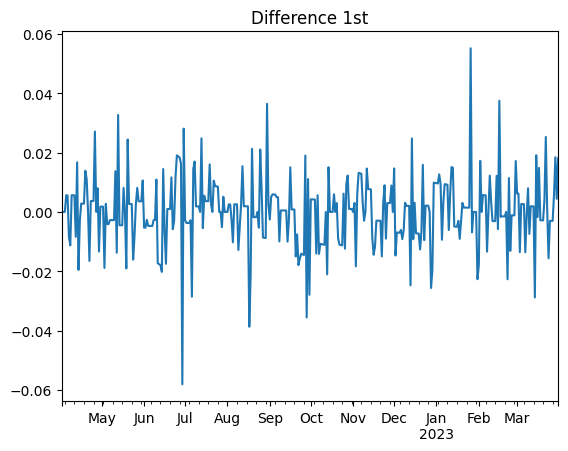

In [14]:
# 차분 안정성 확인 -> d 구하기
diff_1 = data_HDmotor_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')
augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.021573e+00
p-value                        2.069564e-12
#Lags Used                     1.600000e+01
Number of Observations Used    3.460000e+02
Critical Value (1%)           -3.449392e+00
Critical Value (5%)           -2.869930e+00
Critical Value (10%)          -2.571240e+00
dtype: float64


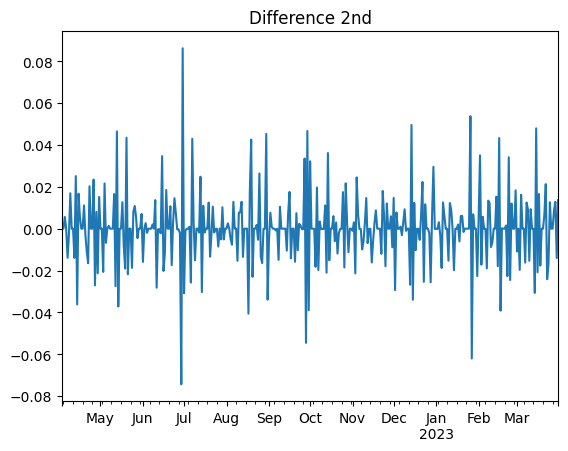

In [15]:
# 차분 안정성 확인 -> d 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')
augmented_dickey_fuller_test(diff_2)

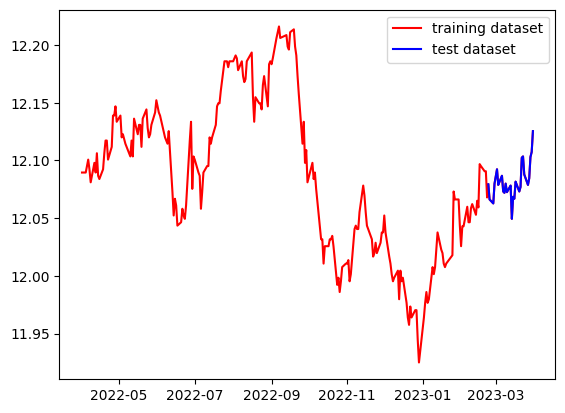

In [16]:
train_data_HDmotor, test_data_HDmotor = data_HDmotor_log[:int(len(data_HDmotor_log)*0.9)],data_HDmotor_log[int(len(data_HDmotor_log)*0.9):]
plt.plot(data_HDmotor_log, c='r', label='training dataset') 
plt.plot(test_data_HDmotor, c='b', label='test dataset')
plt.legend()

In [17]:
import itertools

p = range(0, 2)
d = range(1, 3)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))

AIC = []
for i in pdq :
    model = ARIMA(train_data_HDmotor.values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA pdq : {i} >> AIC : {round(model_fit.aic, 2)}')
    AIC.append(round(model_fit.aic, 2))
print(min(AIC))

ARIMA pdq : (0, 1, 0) >> AIC : -1985.65
ARIMA pdq : (0, 1, 1) >> AIC : -1983.99
ARIMA pdq : (0, 2, 0) >> AIC : -1743.61
ARIMA pdq : (0, 2, 1) >> AIC : -1970.8
ARIMA pdq : (1, 1, 0) >> AIC : -1984.03
ARIMA pdq : (1, 1, 1) >> AIC : -1982.55
ARIMA pdq : (1, 2, 0) >> AIC : -1856.69
ARIMA pdq : (1, 2, 1) >> AIC : -1969.11
-1985.65


위와같이 1차차분과 2차차분 데이터의 adfuller 검정을 실시해본 결과 1차차분이 더 안정적인 데이터라는 것을 알 수 있다.  
p-value가 훨씬 작고 검정통계량 또한 1차차분이 더 작은 값을 나타낼뿐 아니라 critical value에 있어서도 같은 경향을 나타낸다.  
따라서 d값으로 1을 설정하고 모수를 (1,1,0)로 설정하여 예측을 실시하도록 한다.

위와 같이 itertools을 이용해서 최적의 모수를 찾을 수도 있다.  
최적의 모수를 탐색한 결과는 (0, 1, 0)이었지만 시각화를 통하여 분석하는 것이 목표이기에 모수는 (1,1,0)으로 설정하도록 한다.

In [18]:
# Build and Train  Model
model = ARIMA(train_data_HDmotor, order=(1, 1, 0))
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  328
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 994.016
Date:                Sun, 02 Apr 2023   AIC                          -1984.032
Time:                        11:53:47   BIC                          -1976.452
Sample:                    04-01-2022   HQIC                         -1981.008
                         - 02-22-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0343      0.047     -0.732      0.464      -0.126       0.057
sigma2         0.0001   6.57e-06     20.393      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

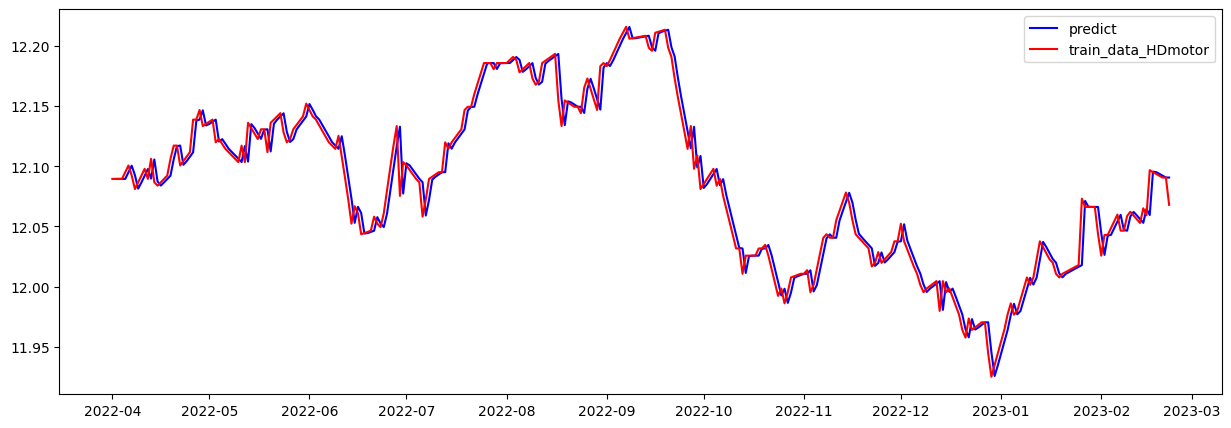

In [19]:
fitted_m_pred = fitted_m.predict()
fitted_m_pred = fitted_m_pred.drop(fitted_m_pred.index[0])
plt.figure(figsize=(15,5), dpi=100)
plt.plot(fitted_m_pred, label='predict',c='b')
plt.plot(train_data_HDmotor, label='train_data_HDmotor',c='r')
plt.legend()
plt.show()

In [20]:
train_data_HDmotor

2022-04-01    12.089539
2022-04-02    12.089539
2022-04-03    12.089539
2022-04-04    12.089539
2022-04-05    12.095141
                ...    
2023-02-18    12.093650
2023-02-19    12.092157
2023-02-20    12.090662
2023-02-21    12.090662
2023-02-22    12.067959
Freq: D, Name: Close, Length: 328, dtype: float64

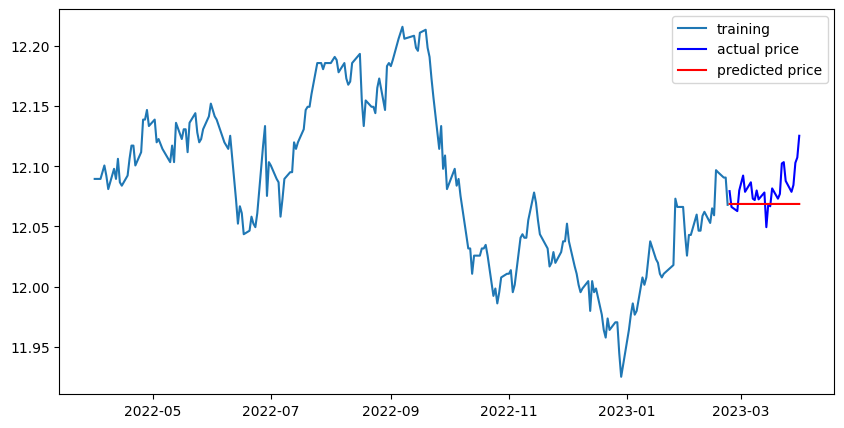

In [21]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data_HDmotor), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data_HDmotor.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data_HDmotor, label='training')
plt.plot(test_data_HDmotor, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data_HDmotor), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_HDmotor), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_HDmotor), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data_HDmotor))/np.abs(np.exp(test_data_HDmotor)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  10627309.446370972
MAE:  2469.7605768383105
RMSE:  3259.955436255375
MAPE: 1.39%


같은 과정을 2번더 반복한다.  
이때 사용하는 주식은 코스피와 코스닥 데이터를 이용하기로 한다.

In [23]:
data_kospi=pd.DataFrame(yf.download('^KS11',
                                          start = '2022-04-01',
                                          end = now,
                                          progress = False))
data_kosdaq=pd.DataFrame(yf.download('^KQ11',
                                          start = '2022-04-01',
                                          end = now,
                                          progress = False))
data_kospi=data_kospi["Close"]
data_kosdaq=data_kosdaq["Close"]
data_kospi_log=np.log(data_kospi)
data_kosdaq_log=np.log(data_kosdaq)

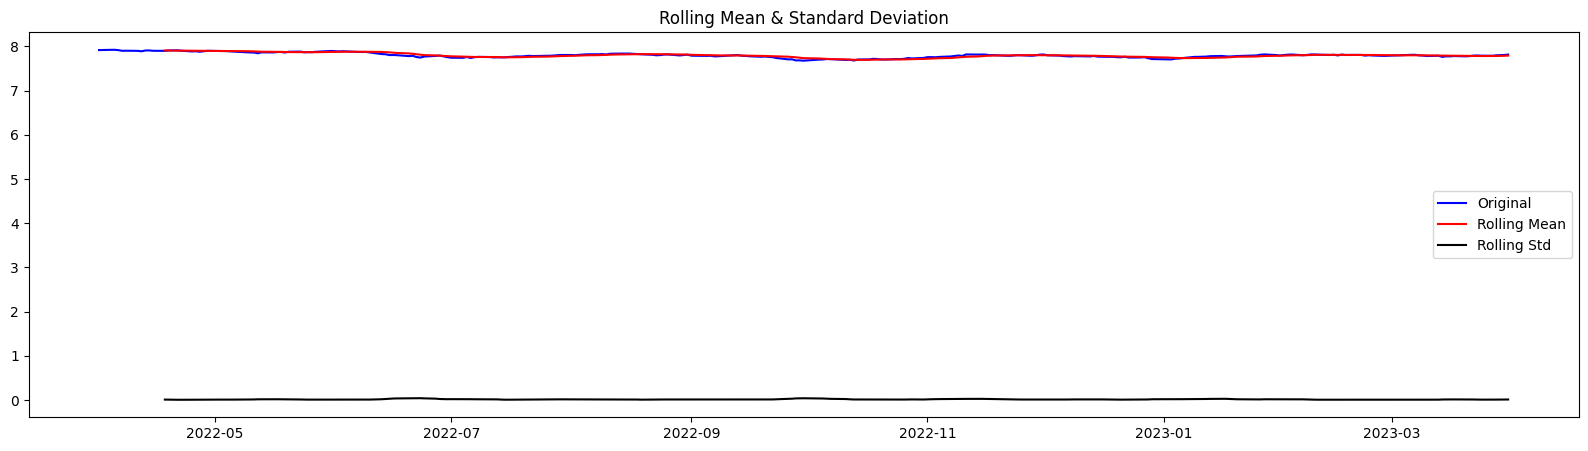

Results of Dickey-Fuller Test:
Test Statistic                  -2.344743
p-value                          0.157943
#Lags Used                       0.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


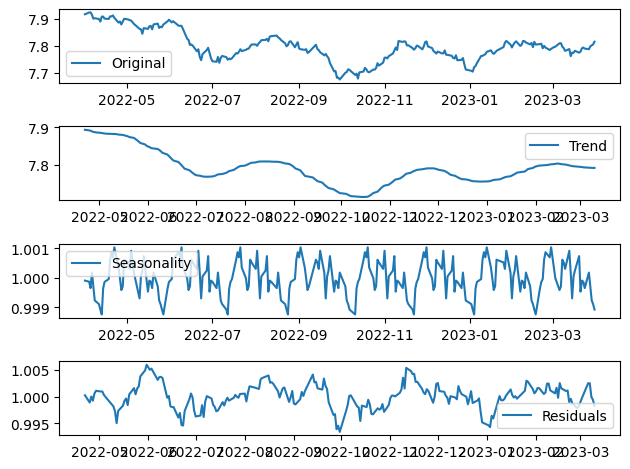

In [24]:
plt.figure(figsize=(20,5))
# 정성적 그래프 분석
plot_rolling_statistics(data_kospi_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(data_kospi_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_kospi_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_kospi_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


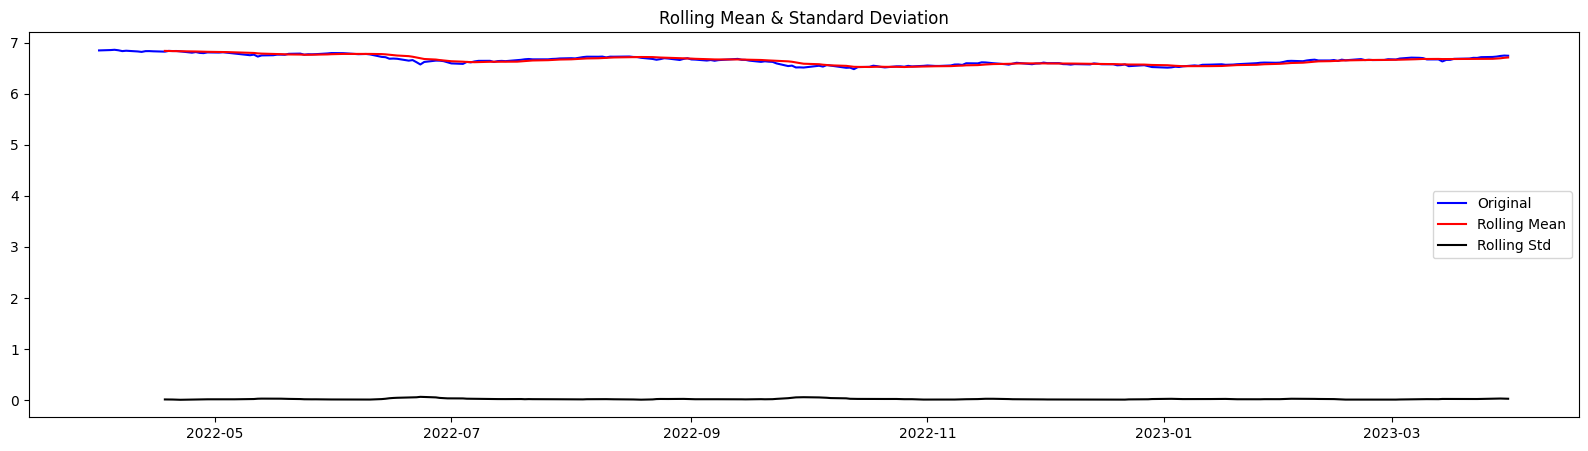

Results of Dickey-Fuller Test:
Test Statistic                  -2.028045
p-value                          0.274413
#Lags Used                       0.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


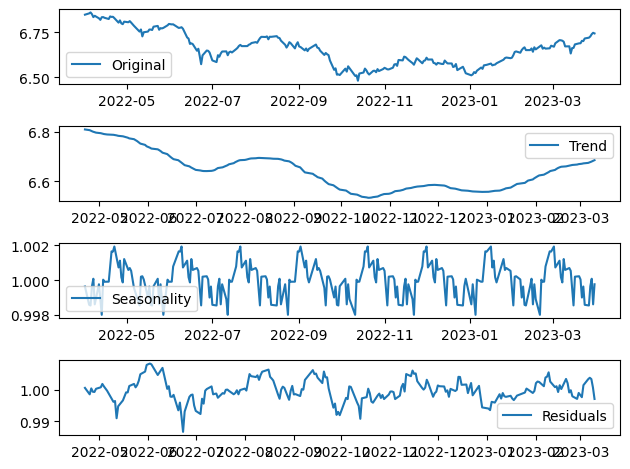

In [25]:
plt.figure(figsize=(20,5))
# 정성적 그래프 분석
plot_rolling_statistics(data_kosdaq_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(data_kosdaq_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_kosdaq_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_kosdaq_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


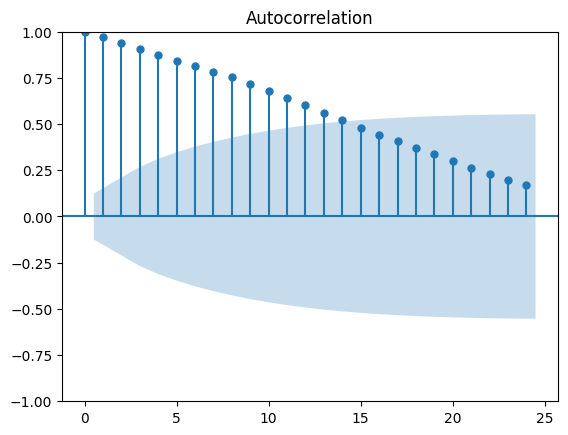

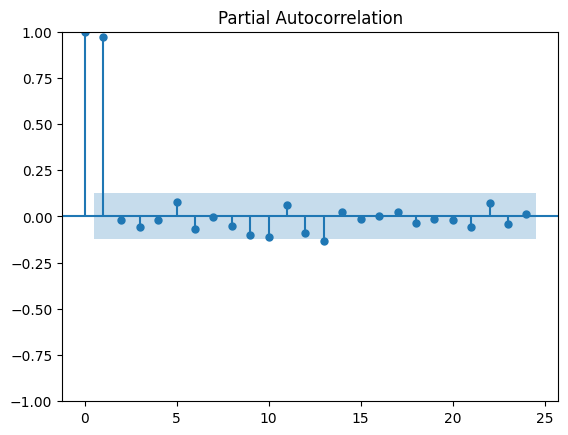

In [26]:
plot_acf(data_kospi_log)
plot_pacf(data_kospi_log)
plt.show()

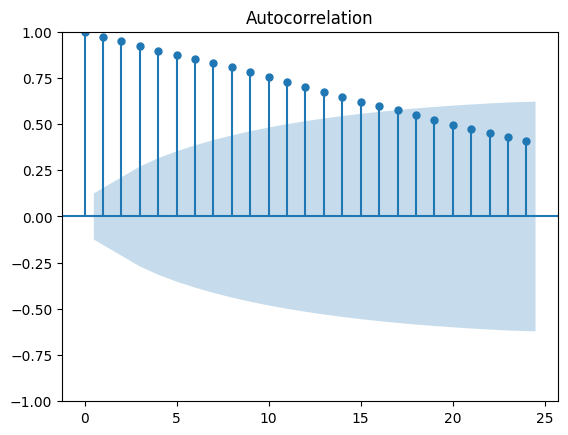

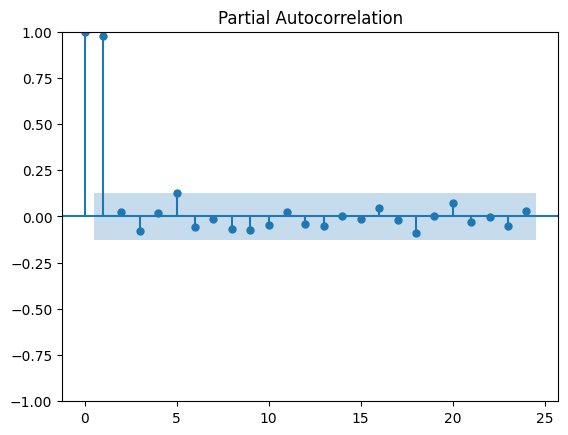

In [27]:
plot_acf(data_kosdaq_log)
plot_pacf(data_kosdaq_log)
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.590431e+01
p-value                        8.260689e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64


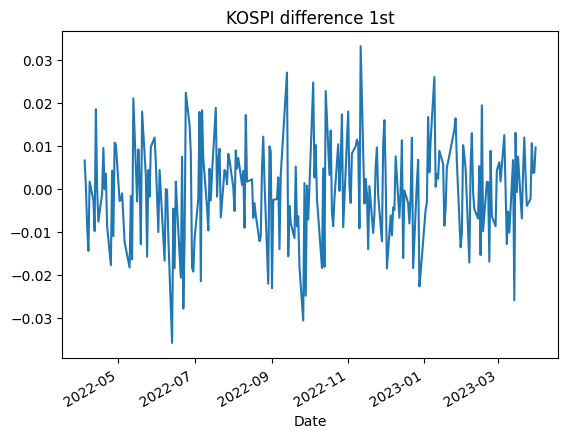

In [28]:
# 차분 안정성 확인 -> d 구하기
diff_1 = data_kospi_log.diff(periods=1).iloc[1:]
diff_1.plot(title='KOSPI difference 1st')
augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.281199e+00
p-value                        4.514794e-13
#Lags Used                     1.000000e+01
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64


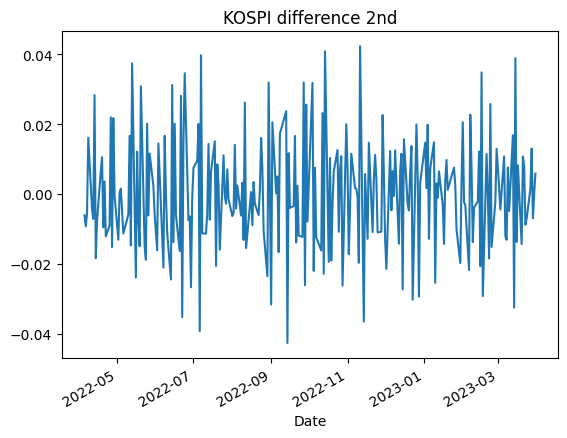

In [29]:
# 차분 안정성 확인 -> d 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='KOSPI difference 2nd')
augmented_dickey_fuller_test(diff_2)

Results of Dickey-Fuller Test:
Test Statistic                -8.621973e+00
p-value                        6.070680e-14
#Lags Used                     3.000000e+00
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.457664e+00
Critical Value (5%)           -2.873559e+00
Critical Value (10%)          -2.573175e+00
dtype: float64


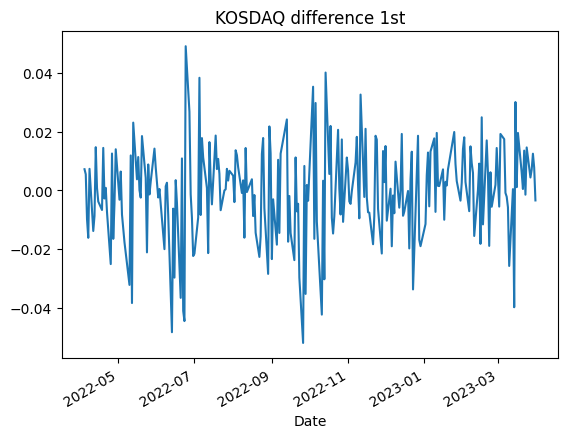

In [30]:
# 차분 안정성 확인 -> d 구하기
diff_1 = data_kosdaq_log.diff(periods=1).iloc[1:]
diff_1.plot(title='KOSDAQ difference 1st')
augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.651625e+00
p-value                        5.096994e-14
#Lags Used                     9.000000e+00
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64


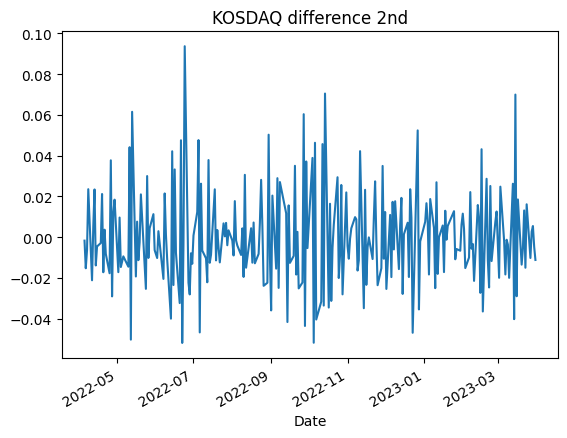

In [31]:
# 차분 안정성 확인 -> d 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='KOSDAQ difference 2nd')
augmented_dickey_fuller_test(diff_2)

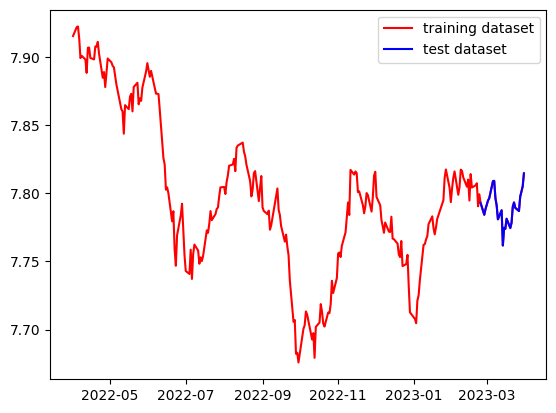

In [32]:
train_data_kospi, test_data_kospi = data_kospi_log[:int(len(data_kospi_log)*0.9)],data_kospi_log[int(len(data_kospi_log)*0.9):]
plt.plot(data_kospi_log, c='r', label='training dataset') 
plt.plot(test_data_kospi, c='b', label='test dataset')
plt.legend()

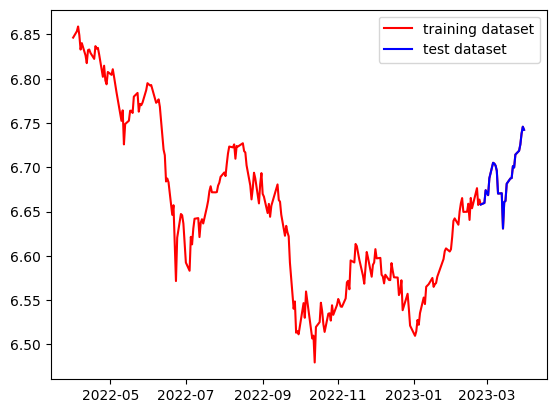

In [33]:
train_data_kosdaq, test_data_kosdaq = data_kosdaq_log[:int(len(data_kosdaq_log)*0.9)],data_kosdaq_log[int(len(data_kosdaq_log)*0.9):]
plt.plot(data_kosdaq_log, c='r', label='training dataset') 
plt.plot(test_data_kosdaq, c='b', label='test dataset')
plt.legend()

In [34]:
p = range(0, 2)
d = range(1, 3)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))

AIC = []
for i in pdq :
    model = ARIMA(train_data_kospi.values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA pdq : {i} >> AIC : {round(model_fit.aic, 2)}')
    AIC.append(round(model_fit.aic, 2))
print(min(AIC))

C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (0, 1, 0) >> AIC : -1349.58
ARIMA pdq : (0, 1, 1) >> AIC : -1347.58
ARIMA pdq : (0, 2, 0) >> AIC : -1188.57
ARIMA pdq : (0, 2, 1) >> AIC : -1335.57
ARIMA pdq : (1, 1, 0) >> AIC : -1347.58
ARIMA pdq : (1, 1, 1) >> AIC : -1346.01
ARIMA pdq : (1, 2, 0) >> AIC : -1257.05
ARIMA pdq : (1, 2, 1) >> AIC : -1333.58
-1349.58


In [35]:
p = range(0, 2)
d = range(1, 3)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))

AIC = []
for i in pdq :
    model = ARIMA(train_data_kosdaq.values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA pdq : {i} >> AIC : {round(model_fit.aic, 2)}')
    AIC.append(round(model_fit.aic, 2))
print(min(AIC))

C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (0, 1, 0) >> AIC : -1192.44
ARIMA pdq : (0, 1, 1) >> AIC : -1191.72
ARIMA pdq : (0, 2, 0) >> AIC : -1016.76
ARIMA pdq : (0, 2, 1) >> AIC : -1179.41
ARIMA pdq : (1, 1, 0) >> AIC : -1191.85
ARIMA pdq : (1, 1, 1) >> AIC : -1189.91
ARIMA pdq : (1, 2, 0) >> AIC : -1098.37
ARIMA pdq : (1, 2, 1) >> AIC : -1179.0
-1192.44


KOSPI와 KOSDAQ 두가지 주식에 대해서 분석을 실시한 결과, 그래프 상으로는 코스피는 모수 (1,1,0)이, 코스닥은 모수 (1,2,0) 가장 적절한 것으로 보인다.  
다만, itertools를 이용한 분석을 실시한 결과 모수 (0,1,0)의 aic가 가장 작은것으로 나타난다.  
하지만 이 과제의 경우 시각화를 통하여 모수를 찾아내는 것이 과제였기에 SARIMAX로 얻어낸 모수의 경우 참고로만 하고 실제 분석에는 시각화로 얻어낸 모수를 사용하기로 한다.

In [36]:
# Build and Train  Model
model_kospi = ARIMA(train_data_kospi, order=(1, 1, 0))
fitted_m_kospi = model_kospi.fit() 

print(fitted_m_kospi.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  223
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 675.792
Date:                Sun, 02 Apr 2023   AIC                          -1347.584
Time:                        11:53:52   BIC                          -1340.778
Sample:                             0   HQIC                         -1344.836
                                - 223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0054      0.071     -0.076      0.940      -0.145       0.134
sigma2         0.0001   1.24e-05     10.718      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when 

In [37]:
# Build and Train  Model
model_kosdaq = ARIMA(train_data_kosdaq, order=(1, 2, 0))
fitted_m_kosdaq = model_kosdaq.fit() 

print(fitted_m_kosdaq.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  222
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 551.187
Date:                Sun, 02 Apr 2023   AIC                          -1098.375
Time:                        11:53:52   BIC                          -1091.588
Sample:                             0   HQIC                         -1095.634
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5648      0.054    -10.391      0.000      -0.671      -0.458
sigma2         0.0004   2.76e-05     14.106      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   7.80   Jarque-

C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when 

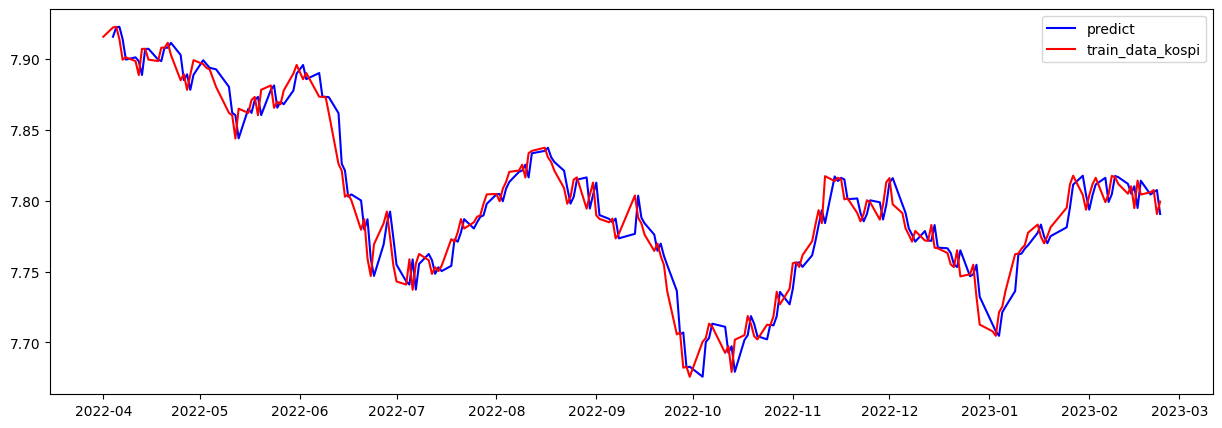

In [38]:
fitted_m_kospi_pred = fitted_m_kospi.predict()
fitted_m_kospi_pred = fitted_m_kospi_pred.drop(fitted_m_kospi_pred.index[0])
plt.figure(figsize=(15,5), dpi=100)
plt.plot(fitted_m_kospi_pred, label='predict',c='b')
plt.plot(train_data_kospi, label='train_data_kospi',c='r')
plt.legend()
plt.show()

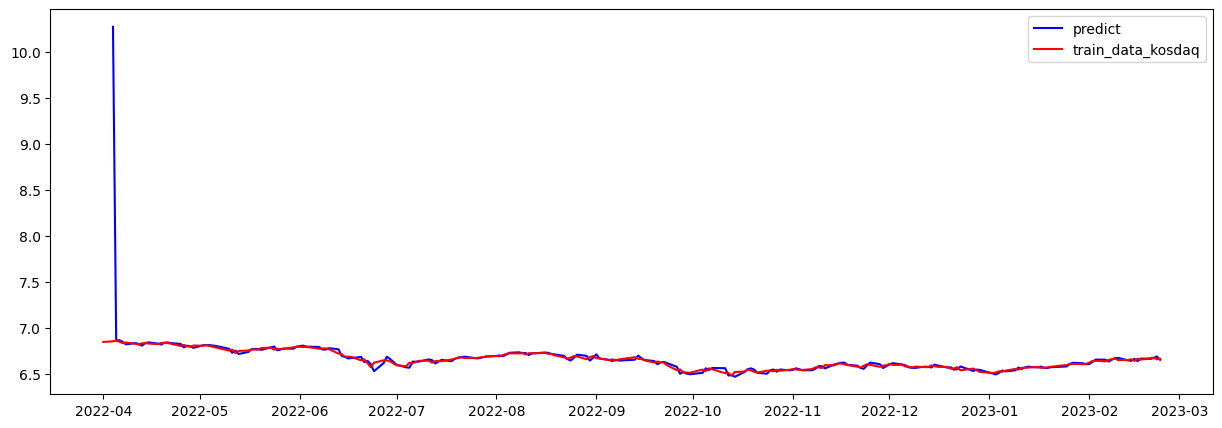

In [39]:
fitted_m_kosdaq_pred = fitted_m_kosdaq.predict()
fitted_m_kosdaq_pred = fitted_m_kosdaq_pred.drop(fitted_m_kosdaq_pred.index[0])
plt.figure(figsize=(15,5), dpi=100)
plt.plot(fitted_m_kosdaq_pred, label='predict',c='b')
plt.plot(train_data_kosdaq, label='train_data_kosdaq',c='r')
plt.legend()
plt.show()

C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


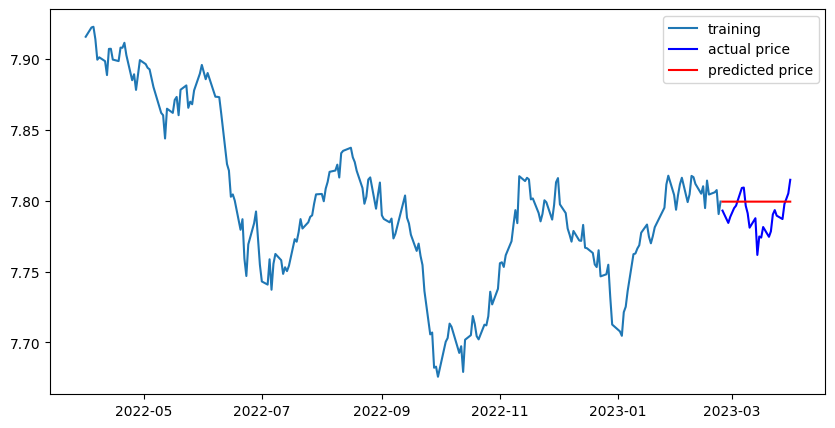

In [40]:
# Forecast : 결과가 fc에 담깁니다. 
fc_kospi = fitted_m_kospi.forecast(len(test_data_kospi), alpha=0.05)  # 95% conf
fc_kospi = np.array(fc_kospi)

# Make as pandas series
fc_kospi_series = pd.Series(fc_kospi, index=test_data_kospi.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data_kospi, label='training')
plt.plot(test_data_kospi, c='b', label='actual price')
plt.plot(fc_kospi_series, c='r',label='predicted price')
plt.legend()
plt.show()

C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


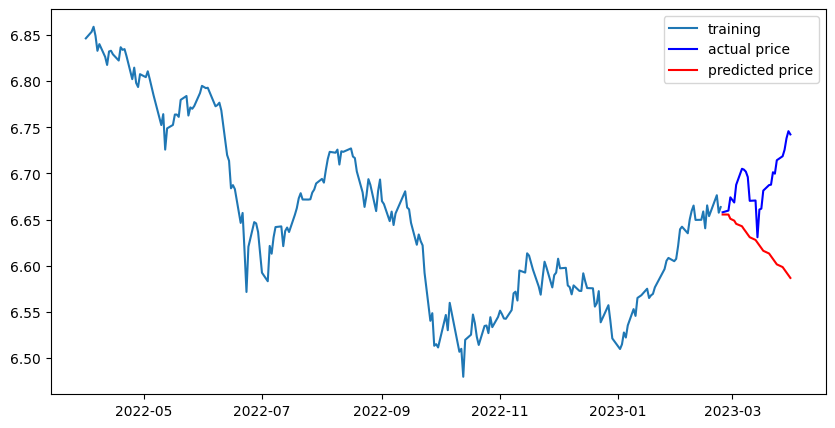

In [41]:
# Forecast : 결과가 fc에 담깁니다. 
fc_kosdaq = fitted_m_kosdaq.forecast(len(test_data_kosdaq), alpha=0.05)  # 95% conf
fc_kosdaq = np.array(fc_kosdaq)

# Make as pandas series
fc_kosdaq_series = pd.Series(fc_kosdaq, index=test_data_kosdaq.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data_kosdaq, label='training')
plt.plot(test_data_kosdaq, c='b', label='actual price')
plt.plot(fc_kosdaq_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data_kospi), np.exp(fc_kospi))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_kospi), np.exp(fc_kospi))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_kospi), np.exp(fc_kospi)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_kospi) - np.exp(test_data_kospi))/np.abs(np.exp(test_data_kospi)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1358.7333629036525
MAE:  30.356836503570392
RMSE:  36.86100056840091
MAPE: 1.26%


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data_kosdaq), np.exp(fc_kosdaq))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_kosdaq), np.exp(fc_kosdaq))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_kosdaq), np.exp(fc_kosdaq)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_kosdaq) - np.exp(test_data_kosdaq))/np.abs(np.exp(test_data_kosdaq)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  4239.658954140575
MAE:  54.43270483129738
RMSE:  65.11266354666022
MAPE: 6.64%


MAPE자체는 모든 데이터에서 15%보다 작게 나왔지만, 이는 원래 데이터에서 log를 취해주었기 때문에 오차가 작게 발생한 것처럼 보일 뿐, 실제 데이터와 예측데이터의 그래프를 보면 전혀 따라가지 못하는 경향을 보인다.  
seasonal_decompose로 데이터를 나눠보면 주식데이터는 계절성을 띄는 데이터이지만 ARIMA 모델 자체가 비계절성을 띄는 데이터의 분석에 사용되는 모델로 대략적인 경향을 예측하는 모델이기에 이러한 결과가 나온 원인중 하나로 생각된다.  
또한 ARIMA 모델은 안정성을 확보하는 것이 필요한 데 반면 해당 데이터들의 p-value값이 높기 때문에 이러한 결과가 나온게 아닌가 추측해본다.  
따라서 트렌드와 계절성을 제거한 residual 데이터로 분석을 실시해본다.

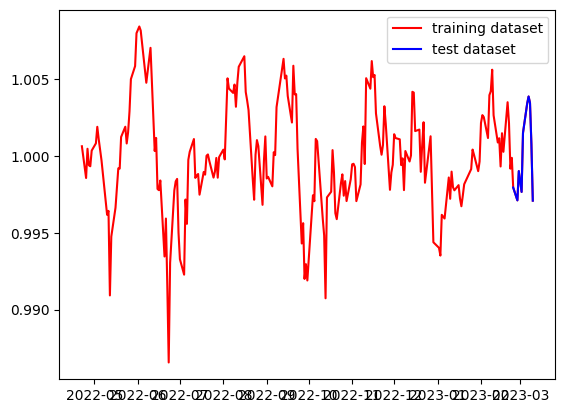

In [44]:
train_data, test_data = residual[:int(len(residual)*0.9)],residual[int(len(residual)*0.9):]
plt.plot(residual, c='r', label='training dataset') 
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [45]:
import itertools

p = range(0, 2)
d = range(1, 3)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))

AIC = []
for i in pdq :
    model = ARIMA(train_data.values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA pdq : {i} >> AIC : {round(model_fit.aic, 2)}')
    AIC.append(round(model_fit.aic, 2))
print(min(AIC))

ARIMA pdq : (0, 1, 0) >> AIC : -1908.95
ARIMA pdq : (0, 1, 1) >> AIC : -1909.85
ARIMA pdq : (0, 2, 0) >> AIC : -1717.93
ARIMA pdq : (0, 2, 1) >> AIC : -1844.46
ARIMA pdq : (1, 1, 0) >> AIC : -1909.96
ARIMA pdq : (1, 1, 1) >> AIC : -1908.12
ARIMA pdq : (1, 2, 0) >> AIC : -1796.5
ARIMA pdq : (1, 2, 1) >> AIC : -1827.85
-1909.96


In [47]:
# Build and Train  Model
model = ARIMA(train_data, order=(0, 1, 1))
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  222
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 956.926
Date:                Sun, 02 Apr 2023   AIC                          -1909.853
Time:                        11:56:09   BIC                          -1903.056
Sample:                             0   HQIC                         -1907.108
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1101      0.063     -1.743      0.081      -0.234       0.014
sigma2      4.999e-06   4.32e-07     11.571      0.000    4.15e-06    5.85e-06
Ljung-Box (L1) (Q):                   0.02   Jarque-

C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when 

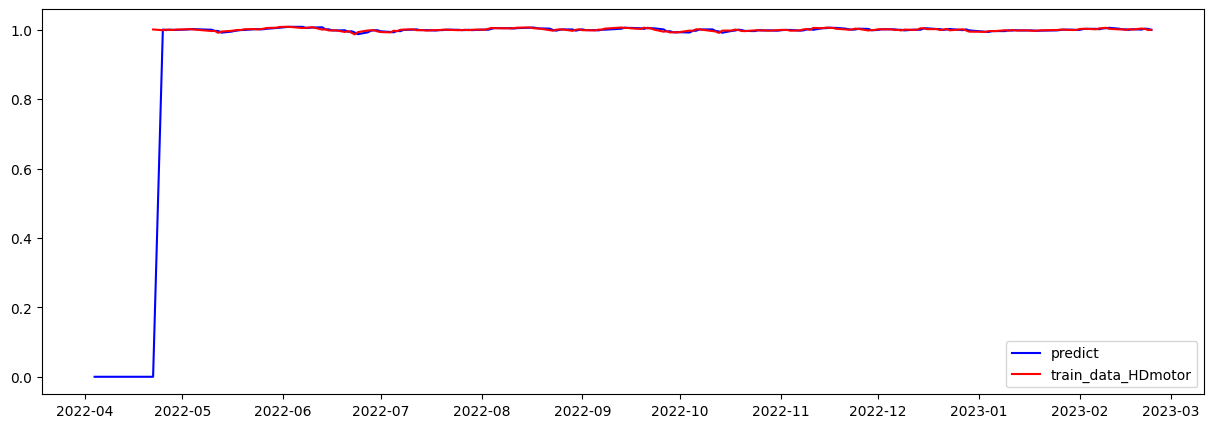

In [48]:
fitted_m_pred = fitted_m.predict()
fitted_m_pred = fitted_m_pred.drop(fitted_m_pred.index[0])
plt.figure(figsize=(15,5), dpi=100)
plt.plot(fitted_m_pred, label='predict',c='b')
plt.plot(train_data, label='train_data_HDmotor',c='r')
plt.legend()
plt.show()

C:\Users\gibeom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


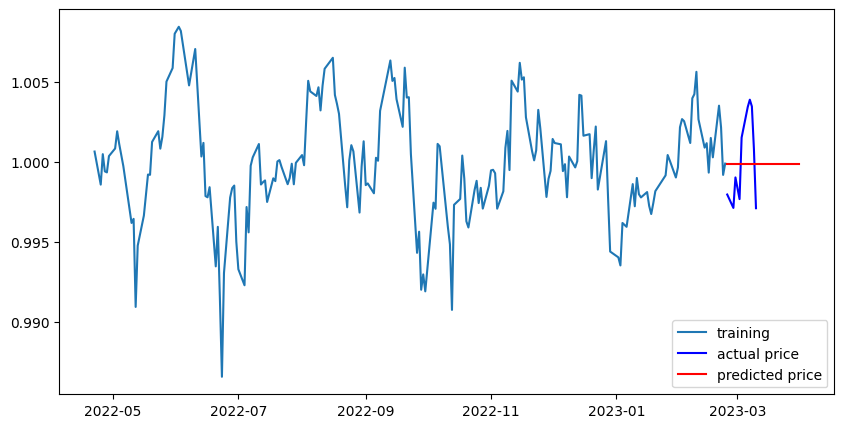

In [49]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

위의 그래프에서도 볼 수 있다시피 ARIMA모델로 분석한 결과는 대략의 경향만을 나타낼뿐 실제데이터에 추종하지는 않는 결과를 얻을 수 있었다.


ARIMA 모델 이외의 다른 모델을 이용해서 시계열 데이터를 분석하면 좀더 예측을 정확하게 할 수 있지 않을까 하는 생각을 해보았다.  
다만 시간관계상 그렇게 까지는 못해본게 아쉽다.